In [1]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('Data\dataset_treino.csv')

In [ ]:
#df = pd.read_csv('Data/dataset_teste.csv')

In [3]:
df.head()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
id                   600 non-null int64
num_gestacoes        600 non-null int64
glicose              600 non-null int64
pressao_sanguinea    600 non-null int64
grossura_pele        600 non-null int64
insulina             600 non-null int64
bmi                  600 non-null float64
indice_historico     600 non-null float64
idade                600 non-null int64
classe               600 non-null int64
dtypes: float64(2), int64(8)
memory usage: 47.0 KB


In [5]:
df.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Let's star with the NAs. We already know that the NA values was inputed with 0. Unfortunely, 0 is a very possible value for 'num_gestacoes', so in this parameter, we will assume that the 0 are real values.
### We also know that there are a lot of outliers and because the mean is very affected by then, we will use the median to deal with the 'NA' values.

In [6]:
#Removing NA values
df['glicose'].replace(to_replace = 0, value = df['glicose'].median(), inplace=True)
df['pressao_sanguinea'].replace(to_replace = 0, value = df['pressao_sanguinea'].median(), inplace=True)
df['grossura_pele'].replace(to_replace = 0, value = df['grossura_pele'].median(), inplace=True)
df['insulina'].replace(to_replace = 0, value = df['insulina'].median(), inplace=True)
df['bmi'].replace(to_replace = 0, value = df['bmi'].median(), inplace=True)
df['indice_historico'].replace(to_replace = 0, value = df['indice_historico'].median(), inplace=True)
df['idade'].replace(to_replace = 0, value = df['idade'].median(), inplace=True)

### In the previous tests, removing the lines with outliers doesen't improve the results. Let's try a different tecnic.

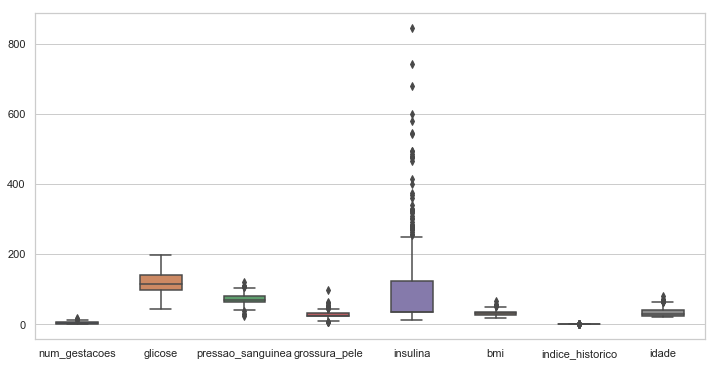

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = df.drop(['id','classe'], axis =1), ax= ax, width=.5)

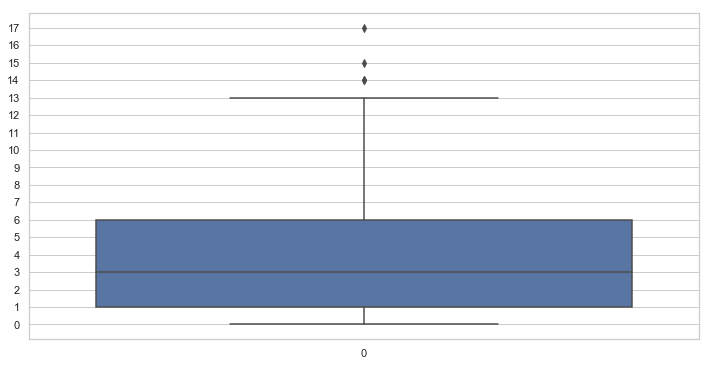

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(0,18))
sns.boxplot(data = df['num_gestacoes'], ax= ax)

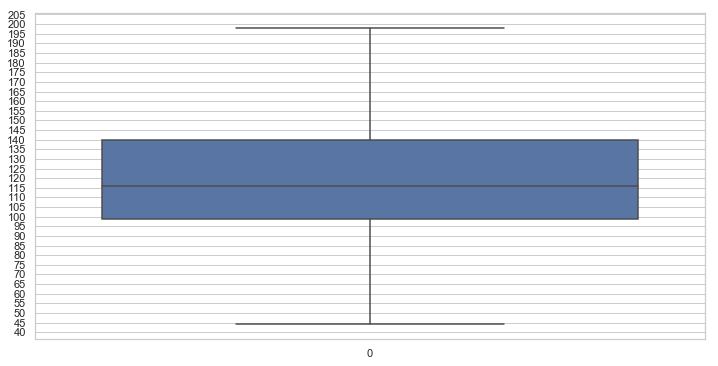

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(40,220, 5))
sns.boxplot(data = df['glicose'], ax= ax)

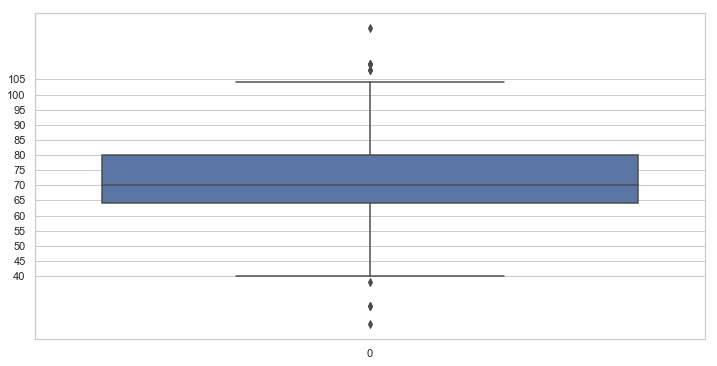

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(40,110, 5))
sns.boxplot(data = df['pressao_sanguinea'], ax= ax)

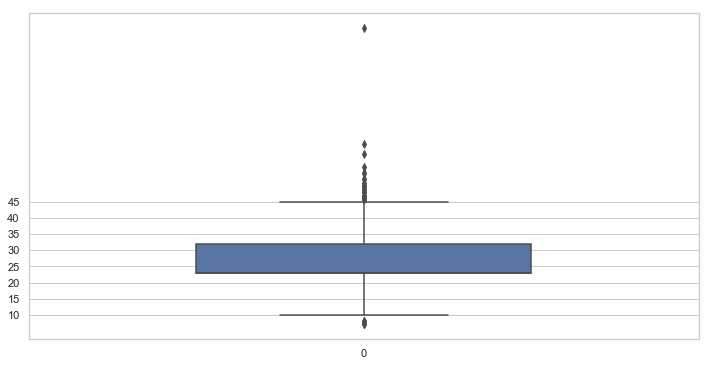

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(10,50, 5))
sns.boxplot(data = df['grossura_pele'], ax= ax, width=.5)

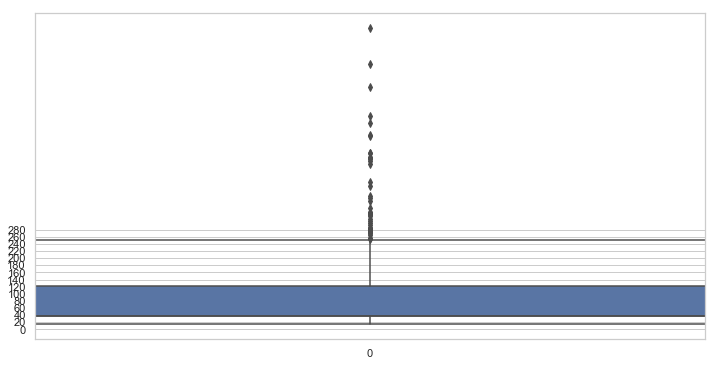

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(0,300, 20))
sns.boxplot(data = df['insulina'], ax= ax, width=2)

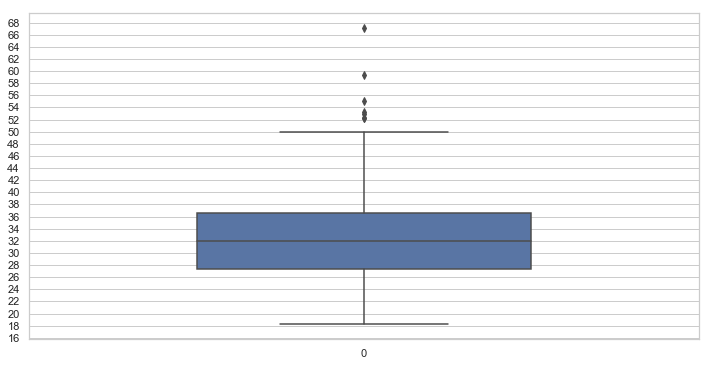

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(0,70, 2))
sns.boxplot(data = df['bmi'], ax= ax, width=.5)

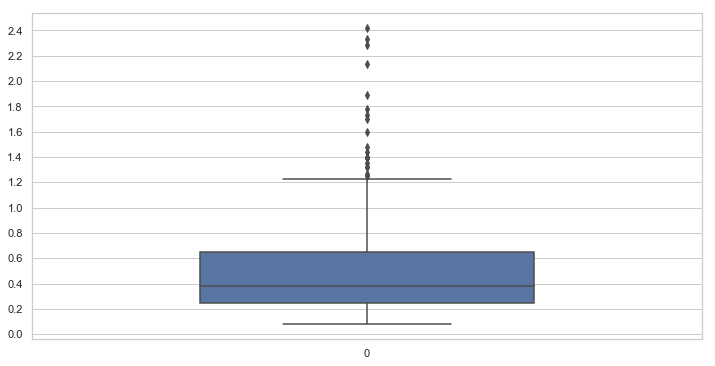

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(np.arange(0,2.5, .2))
sns.boxplot(data = df['indice_historico'], ax= ax, width=.5)

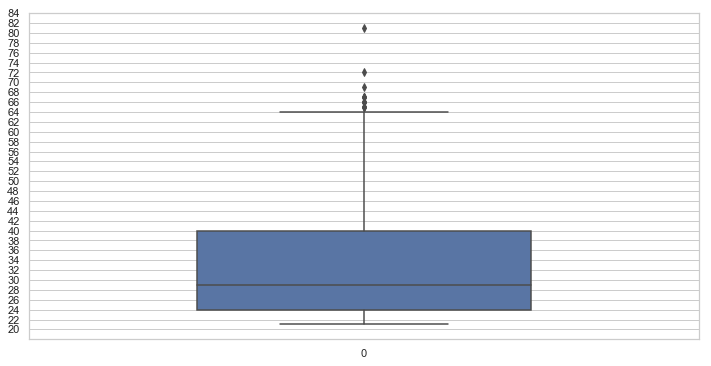

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.yaxis.set_ticks(range(20,90, 2))
sns.boxplot(data = df['idade'], ax= ax, width=.5)

In [16]:
#removing outliers
df['num_gestacoes'] = [0 if x<0 else 13 if x>13 else x for x in df['num_gestacoes']]
df['glicose'] = [45 if x<45 else 200 if x>200 else x for x in df['glicose']]
df['pressao_sanguinea'] = [40 if x<40 else 104 if x>104 else x for x in df['pressao_sanguinea']]
df['grossura_pele'] = [10 if x<10 else 45 if x>45 else x for x in df['grossura_pele']]
df['insulina'] = [20 if x<20 else 250 if x>250 else x for x in df['insulina']]
df['bmi'] = [18 if x<18 else 50 if x>50 else x for x in df['bmi']]
df['indice_historico'] = [.1 if x<.1 else 1.2 if x>1.2 else x for x in df['indice_historico']]
df['idade'] = [21 if x<21 else 64 if x>64 else x for x in df['idade']]

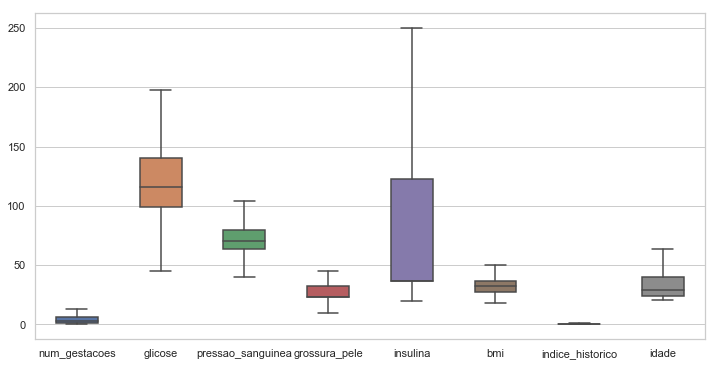

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = df.drop(['id','classe'], axis =1), ax= ax, width=.5)

### Now, let's normalize everything.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
params = list(df.drop(['id','classe'], axis = 1).columns)

In [21]:
df[params] = scaler.fit_transform(df[params])

C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


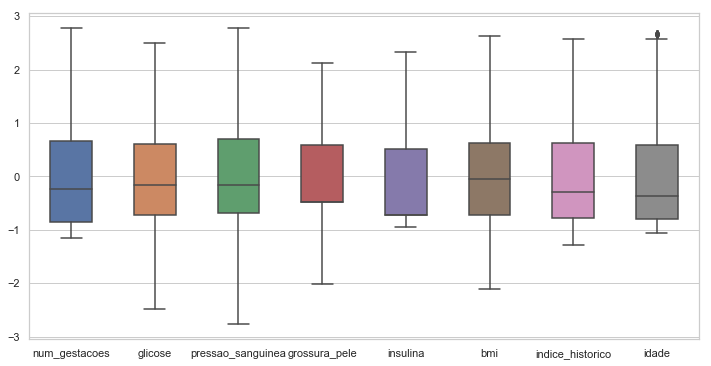

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = df.drop(['id','classe'], axis =1), ax= ax, width=.5)

### Train/Teste split

In [23]:
x = df[params]
y = df['classe']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .2, random_state = 666)

### We know that our data is unbalanced, let's apply SMOTE technique to deal with that.

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=666)
xtrain, ytrain = sm.fit_sample(xtrain, ytrain.ravel())

In [27]:
pd.Series(ytrain).value_counts()

1    317
0    317
dtype: int64

### And run some tests with MLP

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
mlp = MLPClassifier(verbose=False, max_iter=3000, tol=0.0001, solver = 'adam',
                   activation= 'relu')

In [30]:
model = mlp.fit(xtrain,ytrain)

In [31]:
model.score(xtest,ytest)

0.6916666666666667

### Not so good. Let's do some Feature Selection

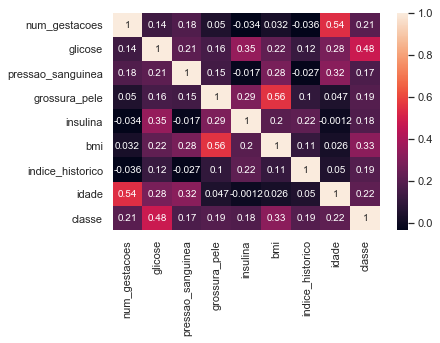

In [32]:
sns.heatmap(df.drop('id', axis = 1).corr(), annot=True)

In [33]:
mlp = MLPClassifier(verbose=False, max_iter=2000, tol=0.0001, solver = 'adam',
                   activation= 'relu', hidden_layer_sizes= (40), random_state=666)
x = df[[ 'glicose','idade','bmi','num_gestacoes','indice_historico']]
y = df['classe']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = .2, random_state = 666)
#sm = SMOTE(random_state=666)
#xtrain, ytrain = sm.fit_sample(xtrain, ytrain.ravel())
model = mlp.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.7583333333333333

In [ ]:
pred = model.predict(df[[ 'glicose','idade','bmi','num_gestacoes','indice_historico']])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(ytest, pred))

In [ ]:
print(confusion_matrix(ytest, pred))

### Not good.
### Will try different ML types with different Preprocessing combinations

In [ ]:
submit = pd.concat([df['id'], pd.Series(pred)], axis=1)

In [ ]:
submit.columns = ['id', 'classe']

In [ ]:
submit.to_csv('submission.csv', index=False)

### Tryed submit the test data prediction. Didn't get any improvement :(

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression(C = 1)

In [36]:
lr.fit(xtrain, ytrain)

C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
lr.score(xtest,ytest)

0.7333333333333333

In [38]:
from sklearn.svm import SVC

In [57]:
svc = SVC(C=1, )

In [58]:
svc.fit(xtrain, ytrain)

C:\Users\Isaque\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
svc.score(xtest, ytest)

0.7333333333333333

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(n_estimators=100, )

In [65]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
rfc.score(xtest, ytest)

0.7333333333333333